In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [10]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200

In [3]:
#load data
df = pd.read_csv('./data/HomePrices.csv')
df.head()

,Price,Area,Bedrooms
0,4.7,74,2.5
1,5.3,80,3.0
2,6.6,100,3.0
3,2.6,50,1.0
4,5.5,80,2.5


In [8]:
x = df[['Area', 'Bedrooms']]
y = df['Price']
x_, y_ = np.array(x), np.array(y)
x_ = sm.add_constant(x_)
print(x_)

[[  1.   74.    2.5]
 [  1.   80.    3. ]
 [  1.  100.    3. ]
 [  1.   50.    1. ]
 [  1.   80.    2.5]
 [  1.   48.    1.5]
 [  1.   74.    2. ]
 [  1.  113.    3. ]
 [  1.   80.    2.5]
 [  1.   48.    1.5]
 [  1.   69.    2.5]
 [  1.   95.    3. ]
 [  1.  135.    3. ]
 [  1.   56.    2. ]
 [  1.   50.    1.5]
 [  1.   95.    2. ]
 [  1.   80.    2. ]
 [  1.   48.    1. ]
 [  1.  113.    3. ]]


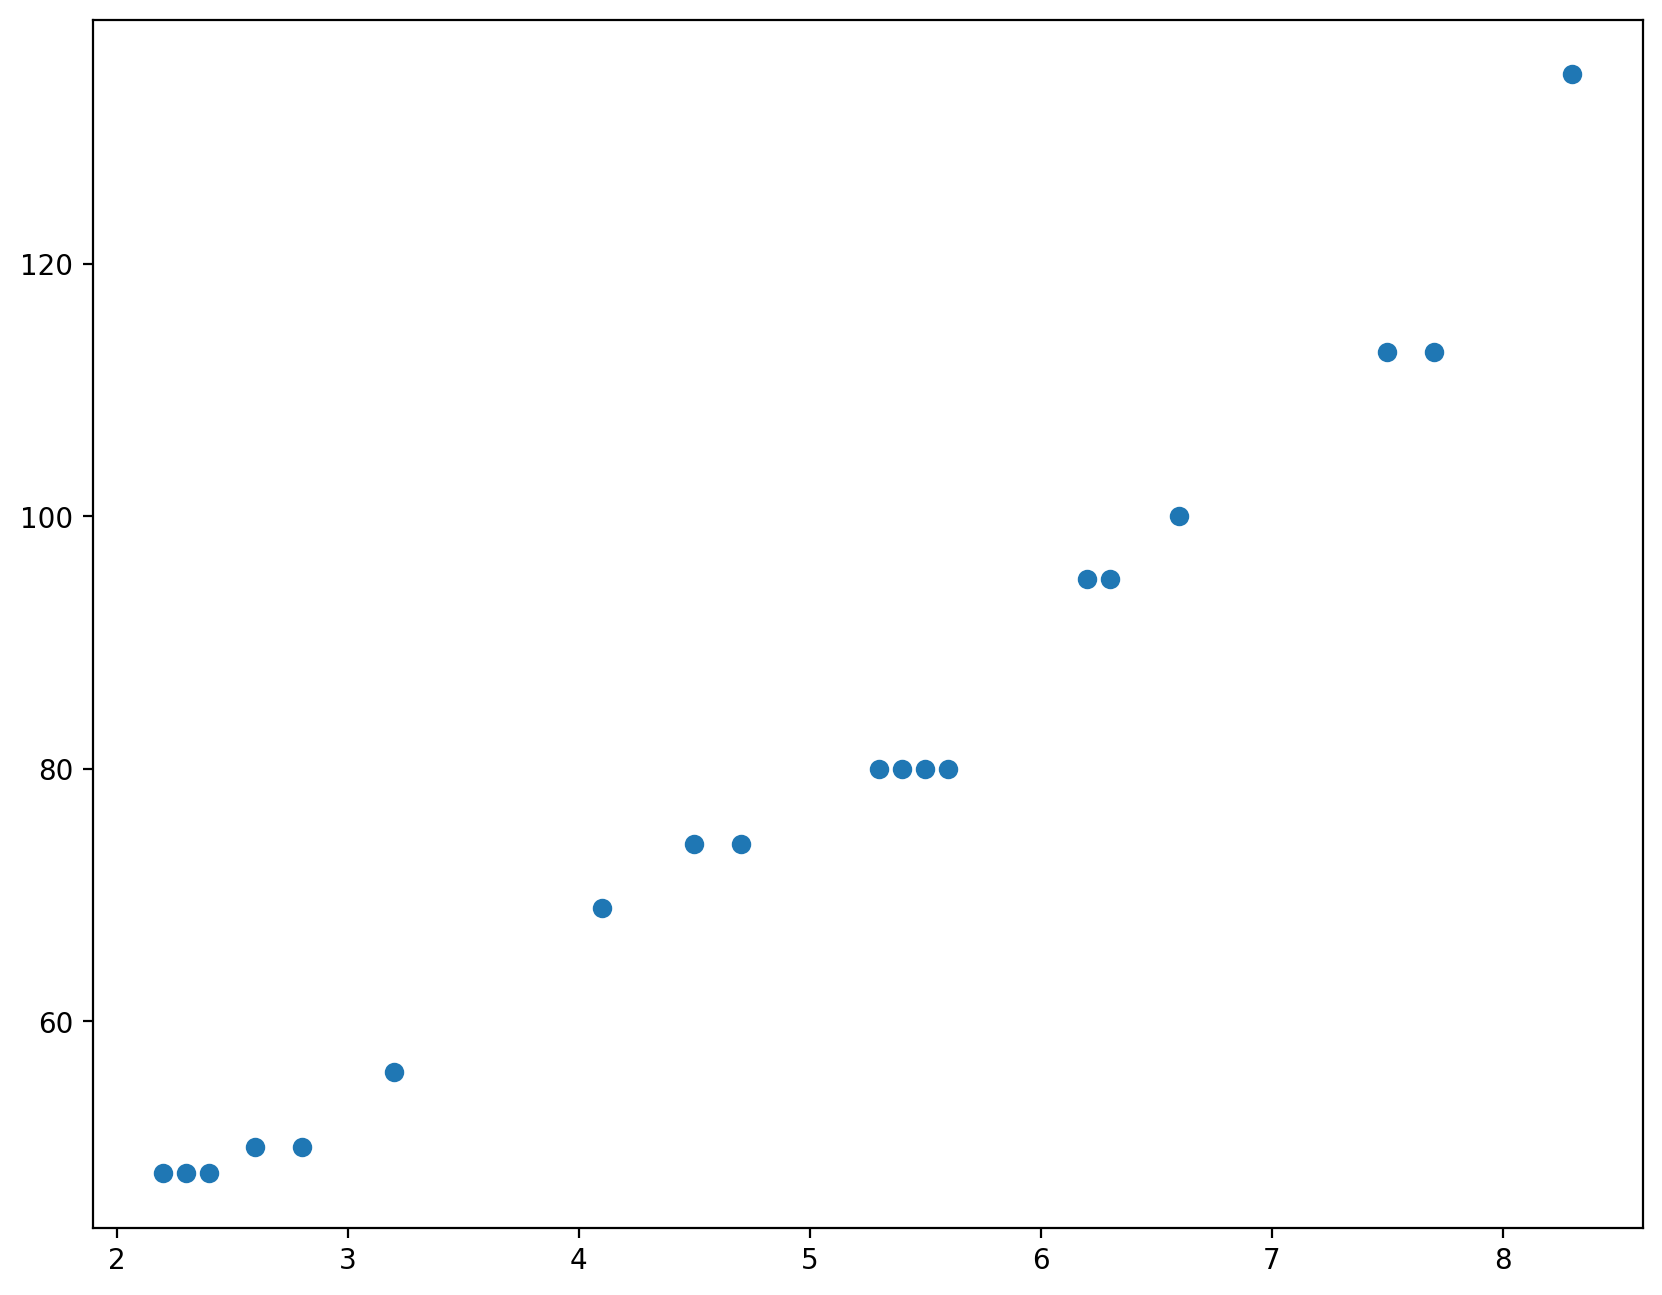

In [12]:
plt.scatter(df.Price, df.Area)

In [14]:
#Create model
model = sm.OLS(y_, x_)
results = model.fit()

R_sqr = results.rsquared
params = results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     346.1
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           6.79e-14
Time:                        08:08:46   Log-Likelihood:                -3.0231
No. Observations:                  19   AIC:                             12.05
Df Residuals:                      16   BIC:                             14.88
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1646      0.251     -4.643      0.0

C:\Users\trunl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


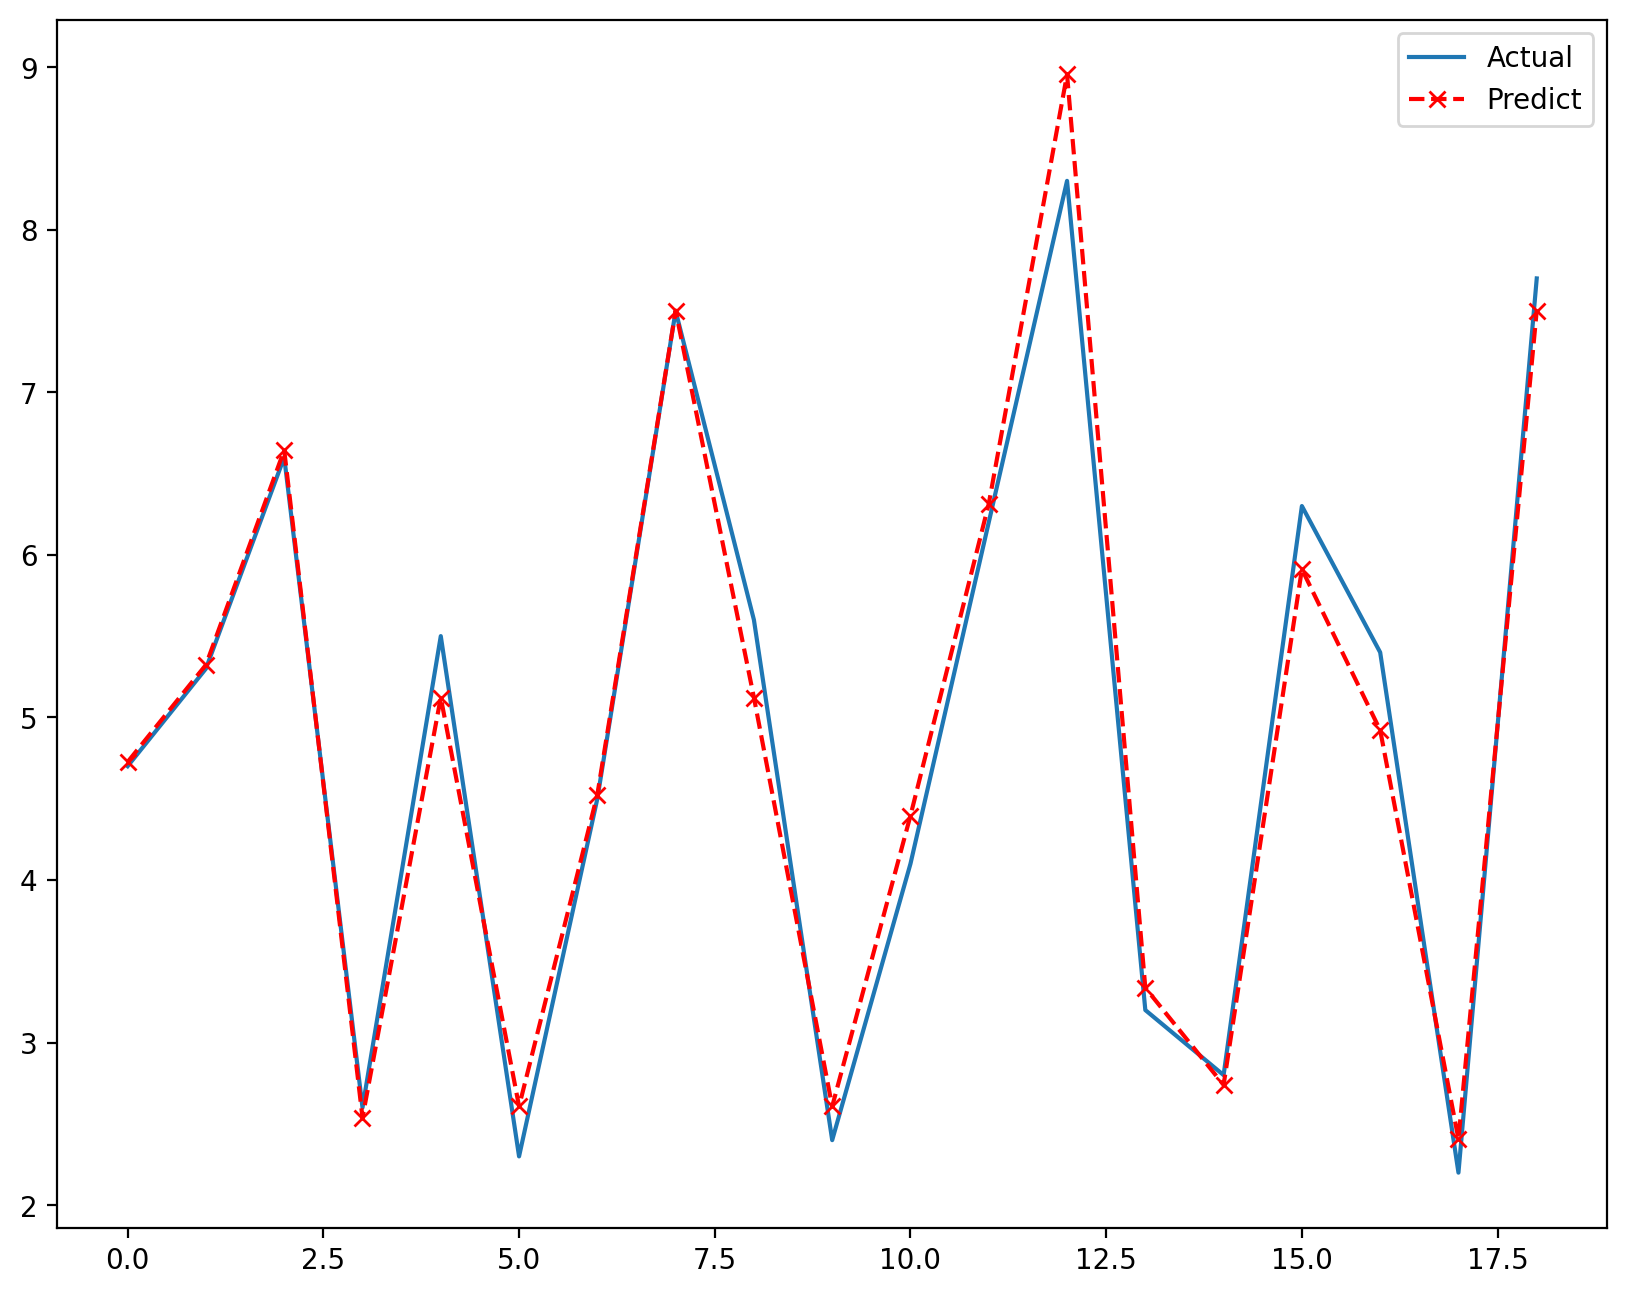

In [17]:
#Predict for present values
pre_values = results.predict(x_)
plt.plot(df['Price'], label = 'Actual')
plt.plot(pre_values, label = 'Predict', color = 'r', marker = 'x', linestyle = '--')
plt.legend()


In [26]:
new_x = np.array([[75,2.5], [110,3]])
new_x = sm.add_constant(new_x)
pre_values_2 = results.predict(new_x)
print(pre_values_2)

[4.79215037 7.30392486]
